# K-mean clustering from scratch

In [17]:
from sklearn.datasets import load_iris
import numpy as np
from copy import  deepcopy
import matplotlib.pyplot as plt

In [18]:
class KMeans:

    def __init__(self, K = 3):
        
        self.X, self.y = self.load_dataset()
        self.N = self.X.shape[0]
        self.K = K

    def load_dataset(self):

        dataset = load_iris()
        X = dataset.data
        y = dataset.target

        return X, y
    
    def init_clusters(self):

        mean = np.mean(self.X, axis = 0)
        std = np.std(self.X, axis = 0)
        centers = np.random.randn(self.K,self.X.shape[1])*std + mean

        return centers

    def run(self):
        
        centers = self.init_clusters()

        centers_old = np.zeros(centers.shape) # to store old centers
        
        centers_new = deepcopy(centers) # Store new centers

        clusters = np.zeros(self.N)
        distances = np.zeros((self.N,self.K))

        error = np.linalg.norm(centers_new - centers_old)

        # When, after an update, the estimate of that center stays the same, exit loop
        while error != 0:
            
            # Measure the distance to every center
            for i in range(self.K):
                distances[:,i] = np.linalg.norm(self.X - centers_new[i], axis=1)
            
            # Assign all training data to closest center
            clusters = np.argmin(distances, axis = 1)
            
            centers_old = deepcopy(centers_new)
            # Calculate mean for every cluster and update the center
            for i in range(self.K):
                centers_new[i] = np.mean(self.X[clusters == i], axis=0)
            error = np.linalg.norm(centers_new - centers_old)
            print(error)

        # Plot the data
        colors=['orange', 'blue', 'green']
        for i in range(self.N):
            plt.scatter(self.X[i, 0], self.X[i,1], s=7, color = colors[int(self.y[i])])
        plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

        

3.5558970790545437
1.2392005325442768
0.4859372607451387
0.13197050375310407
0.038159207034740884
0.0


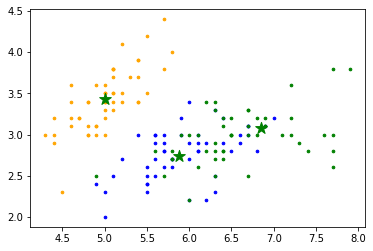

In [19]:
kmeans = KMeans(K = 3)
kmeans.run()